# TP 1 - BronKerbosch

## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Exercice de recherche de cliques maximales dans un Graphe

Ressources :
https://fr.wikipedia.org/wiki/Clique_(th%C3%A9orie_des_graphes)
https://fr.wikipedia.org/wiki/Algorithme_de_Bron-Kerbosch
https://fr.wikipedia.org/wiki/D%C3%A9g%C3%A9n%C3%A9rescence_(th%C3%A9orie_des_graphes)

Implémentation en Python en suivant ces pseudo-codes :

Les graphes seront représentés avec Networkx, l’affichage avec Matplotlib et les graphes peuvent être généré de manière aléatoire (par exemple Erdos Renyi https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html)

## Simple/naïf
```
fonction recherche_clique(graphe G):
    n = nombre de sommets de G
    taille_max_clique = 0
    clique_max = ensemble vide
    
    pour chaque sous-ensemble S de sommets de G:
        si la taille de S > taille_max_clique et est_clique(G, S):
            taille_max_clique = taille de S
            clique_max = S
            
    retourner clique_max
```
```
fonction est_clique(graphe G, ensemble S):
    pour chaque paire de sommets v, w dans S:
        si v n'est pas adjacent à w dans G:
            retourner faux
    retourner vrai
```

In [2]:
def est_clique(G, S):
    for v in S:
        for w in S:
            if v != w and not G.has_edge(v, w):
                return False
    return True

In [10]:
def recherche_clique(G):
    n = G.number_of_nodes()
    taille_max_clique = 0
    clique_max = set()
    
    for S in range(2**n):
        S = set(bin(S)[2:].zfill(n))
        if len(S) > taille_max_clique and est_clique(G, S):
            taille_max_clique = len(S)
            clique_max = S
            
    return clique_max

### Tests

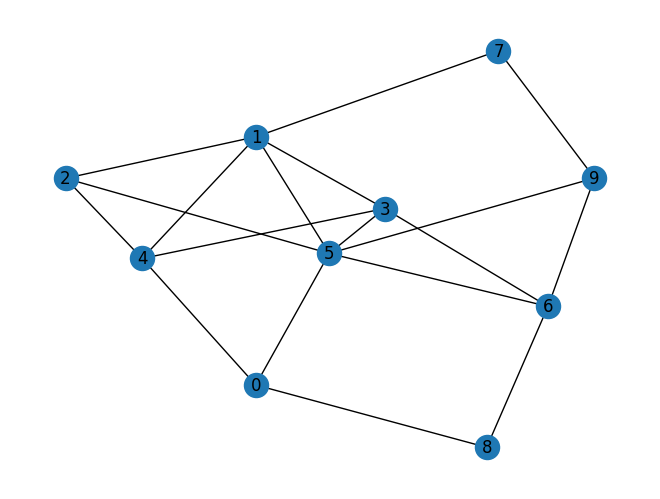

{'0'}

In [11]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)
plt.show()

recherche_clique(G)

## Bron Kerbosch
```
algorithme BronKerbosch1(R, P, X)
    si P et X sont vides alors
        déclarer que R est une clique maximale
    pour tout sommet v dans P faire
        BronKerbosch1(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```
BronKerbosch1(∅, V, ∅) //appel initial

In [12]:
def BronKerbosh1(R, P, X, G):
    if P == set() and X == set():
        print(R)
    for v in list(P):
        BronKerbosh1(R.union({v}), P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G)
        P.remove(v)
        X.add(v)

### Tests

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


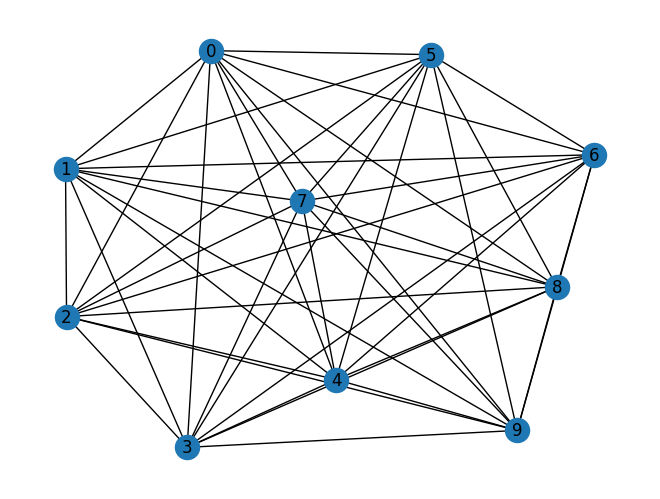

In [13]:
G = nx.erdos_renyi_graph(10, 1)
nx.draw(G, with_labels=True)

BronKerbosh1(set(), set(G.nodes), set(), G)

{0, 1, 2}
{0, 1, 3, 5}
{0, 1, 5, 6}
{0, 8, 2, 7}
{0, 8, 3, 9}
{0, 8, 3, 7}
{0, 9, 3, 5}
{0, 3, 5, 7}
{0, 9, 5, 6}
{1, 2, 4}
{1, 4, 5}
{2, 4, 7}
{4, 5, 7}


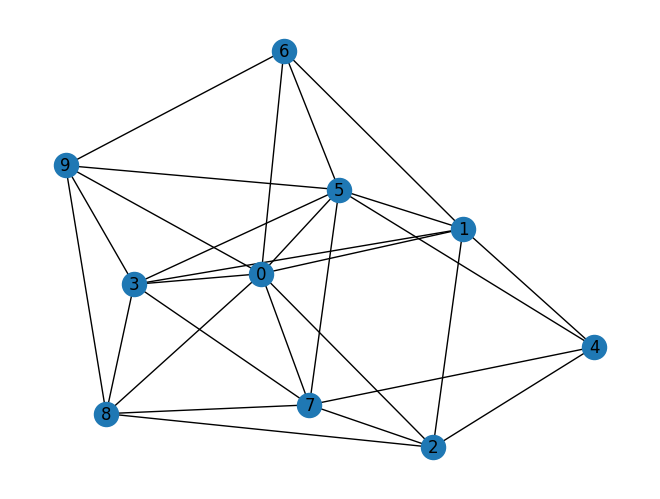

In [7]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)

BronKerbosh1(set(), set(G.nodes), set(), G)

## Bron Kerbosch pivot
```
algorithme BronKerbosch2(R, P, X)
    si P et X sont vides alors
        déclarer que R est une clique maximale
    choisir un sommet pivot u dans P ⋃ X
    pour tout sommet v dans P \ N(u) faire
        BronKerbosch2(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [8]:
def BronKerbosh2(R, P, X, G):
    if P == set() and X == set():
        print(R)
    u = list(P.union(X))[0]
    for v in list(P.difference(G.neighbors(u))):
        BronKerbosh2(R.union({v}), P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G)
        P.remove(v)
        X.add(v)

### Tests

{0, 1, 8, 7}


IndexError: list index out of range

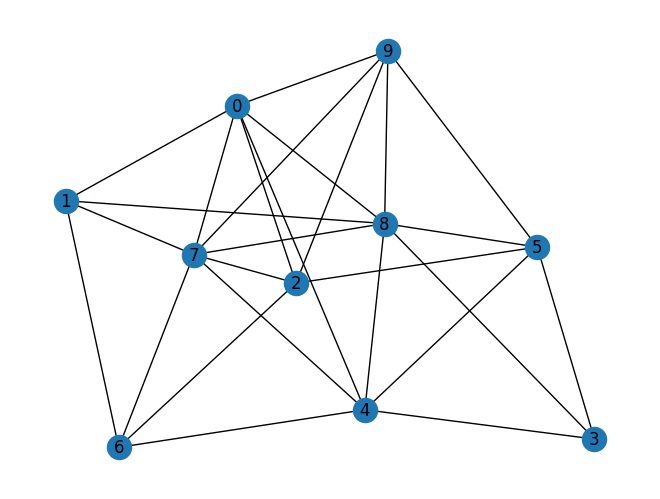

In [9]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)

BronKerbosh2(set(), set(G.nodes), set(), G)

## Bron Kerbosch pivot et dégénérescence
```
algorithme BronKerbosch3(G)
    P = V(G)
    R = Ø
    X = Ø
    pour tout sommet v visités dans un ordre de dégénérescence de G faire
        BronKerbosch2({v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [ ]:
def Bronkerbosh3(G):
    P = set(G.nodes)
    R = set()
    X = set()
    for v in list(G.nodes):
        BronKerbosh2({v}, P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G)
        P.remove(v)
        X.add(v)

### Tests

In [ ]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)

Bronkerbosh3(G)

## Dégénérescence

- Initialiser la liste de sortie L à la liste vide.
- Calculer une valeur dv pour chaque sommet v de G, qui est le nombre de voisins de v qui n'est pas déjà dans L (initialement, il s'agit donc du degré des sommets dans G).
- Initialiser un tableau D tel que D[i] contienne la liste des sommets v qui ne sont pas déjà dans L pour lesquels dv = i.
- Initialiser la valeur k à 0.
- Répéter n fois:
    - Parcourir les cellules du tableau D[0], D[1], ... jusqu'à trouver un i pour lequel D[i] est non-vide.
    - Mettre k à max(k,i).
    - Sélectionner un sommet v de D[i], ajouter v en tête de L et le retirer de D[i].
    - Pour chaque voisin w de v qui n'est pas déjà dans L, retirer une unité de dw et déplacer w de la cellule de D correspondant à la nouvelle valeur de dw.